In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from google.colab import drive
import pandas as pd

print("All dependencies are imported.")

All dependencies are imported.


In [2]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exams.csv')
print("Student performance dataset:")
display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Student performance dataset:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [3]:
# Dataset information
print("Dataset information:")
display(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

In [6]:
# Dataset description
print("Dataset description:")
display(df.describe())

Dataset description:


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [8]:
# Checking for missing values
print("Null counts:")
display(df.isnull().sum())

Null counts:


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [9]:
# Categorical columns to encode
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

# Label encoding the categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("Label Encoding the categorical columns:")
display(df.head())

Label Encoding the categorical columns:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,59,70,78
1,1,3,0,1,1,96,93,87
2,0,3,4,0,1,57,76,77
3,1,1,4,0,1,70,70,63
4,0,3,0,1,1,83,85,86


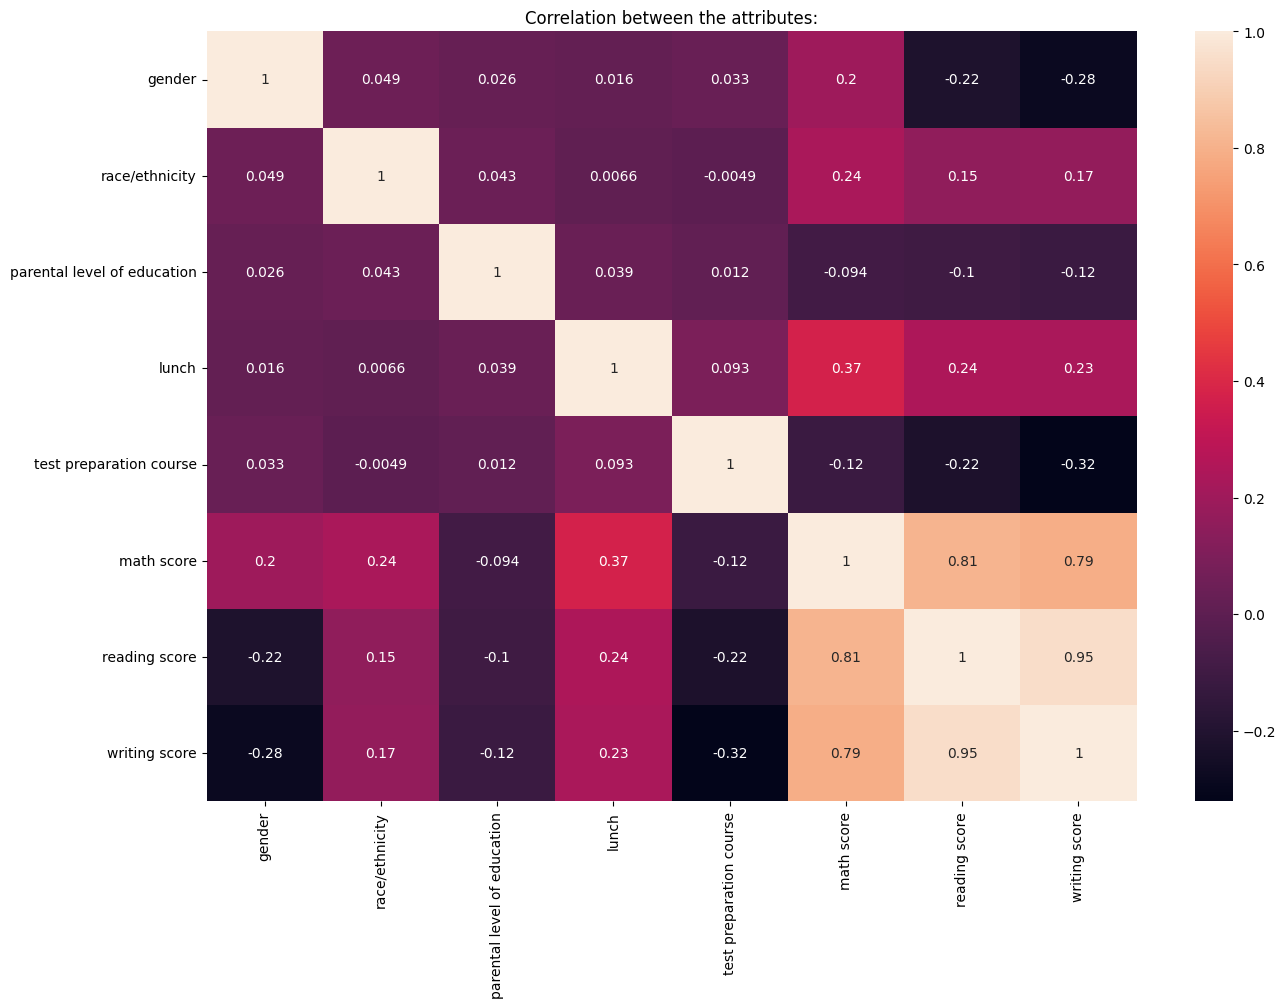

In [10]:
# Correlation heatmap
plt.figure(figsize=(15,10))
plt.title('Correlation between the attributes:')
sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
# Define input and output (X and y)
y = df["math score"]
x = df.drop("math score", axis=1)
print("Input variables:")
display(x)
print()
print("Output:")
display(y)

Input variables:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,3,4,1,0,70,78
1,1,3,0,1,1,93,87
2,0,3,4,0,1,76,77
3,1,1,4,0,1,70,63
4,0,3,0,1,1,85,86
...,...,...,...,...,...,...,...
995,1,2,4,1,1,77,71
996,1,2,4,1,1,66,66
997,0,0,2,1,0,86,86
998,1,4,2,1,1,72,62



Output:


,math score
0,59
1,96
2,57
3,70
4,83
...,...
995,77
996,80
997,67
998,80


In [13]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("Shapes after train-test split:")
print(f"Training input: {x_train.shape}")
print(f"Testing input: {x_test.shape}")
print(f"Training output: {y_train.shape}")
print(f"Testing output: {y_test.shape}")

Shapes after train-test split:
Training input: (750, 7)
Testing input: (250, 7)
Training output: (750,)
Testing output: (250,)


In [14]:
# Linear Regression model
model = LinearRegression()

In [16]:
# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# Predictions
y_pred = model.predict(x_test)

In [19]:
# Evaluate the model
print(f"Model Evaluation of {model}:")
print("\nR2 Score:")
print(r2_score(y_test, y_pred))
print("\nMean Absolute Error:")
print(mean_absolute_error(y_test, y_pred))
print("\nMean Squared Error:")
print(mean_squared_error(y_test, y_pred))

Model Evaluation of LinearRegression():

R2 Score:
0.8740713514754447

Mean Absolute Error:
4.296602636419488

Mean Squared Error:
27.20734994601512


In [20]:
# Prediction based on new input values
print("Enter the details for the prediction:")
encoded_values = {}
gender = "male"
race = "group C"
parental_level_of_education = "some college"
lunch = "standard"
test_preparation_course = "none"
reading_score = 77
writing_score = 71
print([gender, race, parental_level_of_education, lunch, test_preparation_course, reading_score, writing_score])

Enter the details for the prediction:
['male', 'group C', 'some college', 'standard', 'none', 77, 71]


In [21]:
# Encode the categorical columns for prediction
cols_to_encode = {
    "gender": gender,
    "race/ethnicity": race,
    "parental level of education": parental_level_of_education,
    "lunch": lunch,
    "test preparation course": test_preparation_course
}

for col, val in cols_to_encode.items():
    le = label_encoders[col]
    encoded_values[col] = le.transform([val])

print("Encoded values:")
display(encoded_values)

Encoded values:


{'gender': array([1]),
 'race/ethnicity': array([2]),
 'parental level of education': array([4]),
 'lunch': array([1]),
 'test preparation course': array([1])}

In [22]:
# Create a DataFrame for the new data
new_data = pd.DataFrame(encoded_values)
new_data['reading score'] = float(reading_score)
new_data['writing score'] = float(writing_score)

print("New row for predictions:")
display(new_data)

New row for predictions:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,1,2,4,1,1,77.0,71.0


In [23]:
# Predict math score for the new data
pred_math_score = model.predict(new_data)
pred_math_score = round(pred_math_score[0], 2)
print(f"Predicted Math Score: {pred_math_score}")

Predicted Math Score: 80.14


In [24]:
# Add the predicted score to the new_data DataFrame
new_data["math score"] = pred_math_score
print("\nRow with predicted math score:")
display(new_data)


Row with predicted math score:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,1,2,4,1,1,77.0,71.0,80.14
